In [1]:
import sys
sys.path.insert(0, "/home/qite/my/pytorch-pose/")

In [2]:
from pose.datasets import Mpii
mpii = Mpii(jsonfile='/home/qite/my/pytorch-pose/data/mpii/mpii_annotations.json',
            img_folder='/home/qite/my/pytorch-pose/data/mpii/images',
            meanstd_file='/home/qite/my/pytorch-pose/data/mpii/mean.pth.tar',
            sigma=1, label_type="Gaussian", label_data=Mpii.LABEL_MIX_MAP, single_person=True)

    Mean: 0.4404, 0.4440, 0.4327
    Std:  0.2458, 0.2410, 0.2468


10470
5.0
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  9.48000000e+02   3.36000000e+02   1.00000000e+00]
 [  9.35414978e+02   2.87247986e+02   1.00000000e+00]
 [  8.65585022e+02   1.67520008e+01   1.00000000e+00]
 [  5.84000000e+02   5.53000000e+02   1.00000000e+00]
 [  6.54000000e+02   4.39000000e+02   1.00000000e+00]
 [  8.03000000e+02   3.26000000e+02   1.00000000e+00]
 [  1.09300000e+03   3.46000000e+02   1.00000000e+00]
 [  1.16900000e+03   6.36000000e+02   1.00000000e+00]
 [  1.24400000e+03   5.90000000e+02   1.00000000e+00]]
[[ 98.  -3.   0.]
 [ 98.  -3.   0.]
 [ 98.  -3.   0.]
 [ 98.  -3.   0.]
 [ 98.  -3.   0.]
 [ 98.  -3.   0.]
 [ 98.  -3.   0.]

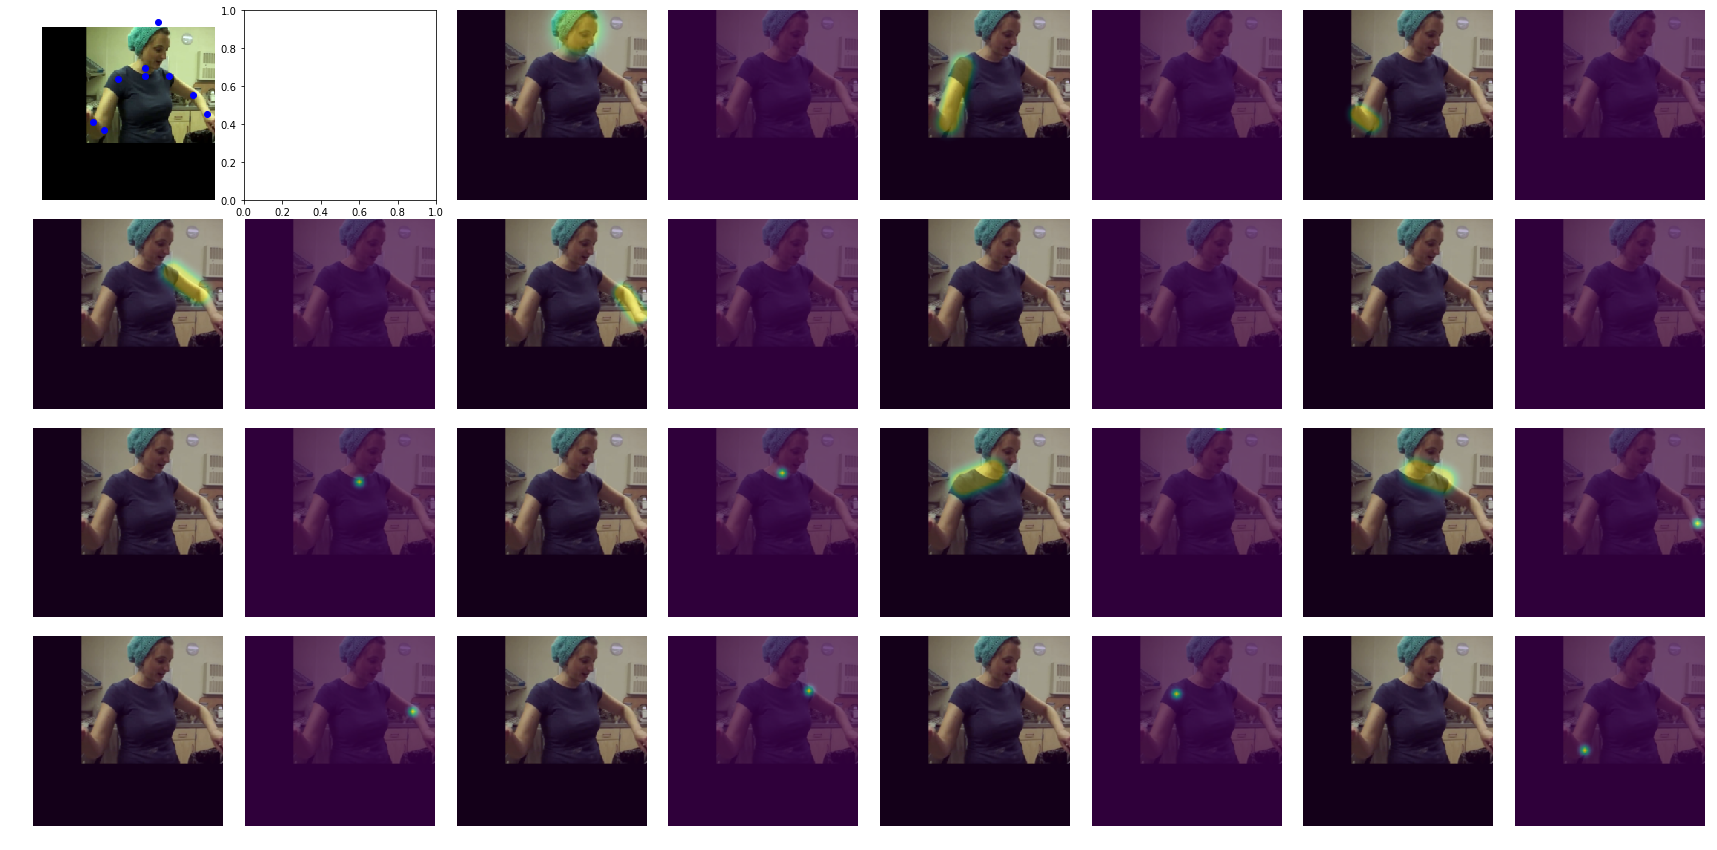

In [7]:
%matplotlib inline
import numpy as np
from scipy.misc import imresize
import matplotlib.pyplot as plt
from pose.utils.misc import to_numpy
import torch

mpii.scale_temp = 5.
mpii.rot_temp = 0.

fig, axs = plt.subplots(4, 8, figsize=(30, 15), gridspec_kw={'wspace':0.1, 'hspace':0.1})
img_idx = np.random.randint(0, len(mpii))
img_idx = 10470
#img_idx = 16765
print(img_idx)
np.seterr(invalid='raise')
img, target, meta = mpii[img_idx]
target_v = target['parts_v']
mask_v = meta['mparts_v']
target_a = target['parts_a']
target_p = target['points']
pts = to_numpy(meta['pts'][0])
tpts = to_numpy(meta['tpts'][0])
not_annoted = (np.isclose(pts, 0).sum(1) == 3)
print(pts)
print(tpts)
xs = tpts[:, 0] * 4
ys = tpts[:, 1] * 4
real_img = to_numpy(img).transpose(1,2,0) + mpii.mean
axs[0,0].imshow(real_img)
visible = (tpts[:, 2] == 1)
axs[0,0].scatter(xs[~not_annoted & visible], ys[~not_annoted & visible], color='blue')
axs[0,0].scatter(xs[~not_annoted & ~visible], ys[~not_annoted & ~visible], color='gray')
axs[0,0].axis('off')
for i in range(target_v.shape[0]):
    axs.flat[(i+1)*2].imshow(real_img)
    target_v[i][mask_v[i]==2] = 0
    timg_v = imresize(to_numpy(target_v[i]), real_img.shape[:2])
    # timg_mask_v = imresize(to_numpy(mask_v[i]==2), real_img.shape[:2])
    axs.flat[(i+1)*2].imshow(timg_v, alpha=0.3)
    # axs.flat[(i+1)*2].imshow(timg_mask_v, alpha=0.3)
    axs.flat[(i+1)*2].axis('off')
    axs.flat[(i+1)*2+1].imshow(real_img)
    timg_a = imresize(to_numpy(target_p[i]), real_img.shape[:2])
    axs.flat[(i+1)*2+1].imshow(timg_a, alpha=0.7)
    axs.flat[(i+1)*2+1].axis('off')
    
# fig2, axs2 = pt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'wspace':0.02, 'hspace':0.02})

#axs[0,1].imshow(final_img)

In [5]:
mpii.anno[mpii.train[10470]]

{u'annolist_index': 12139.0,
 u'dataset': u'MPI',
 u'img_height': 720.0,
 u'img_paths': u'010258456.jpg',
 u'img_width': 1280.0,
 u'isValidation': 0.0,
 u'joint_others': {u'_ArrayData_': None,
  u'_ArraySize_': [0, 0],
  u'_ArrayType_': u'double'},
 u'joint_self': [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [948.0, 336.0, 1.0],
  [935.415, 287.248, 1.0],
  [865.585, 16.752, 1.0],
  [584.0, 553.0, 1.0],
  [654.0, 439.0, 1.0],
  [803.0, 326.0, 1.0],
  [1093.0, 346.0, 1.0],
  [1169.0, 636.0, 1.0],
  [1244.0, 590.0, 1.0]],
 u'numOtherPeople': 0.0,
 u'objpos': [1035.0, 423.0],
 u'objpos_other': {u'_ArrayData_': None,
  u'_ArraySize_': [0, 0],
  u'_ArrayType_': u'double'},
 u'people_index': 1.0,
 u'scale_provided': 8.381,
 u'scale_provided_other': {u'_ArrayData_': None,
  u'_ArraySize_': [0, 0],
  u'_ArrayType_': u'double'}}